The problem is related to HR analytics. The task is to predict whether an employee will be nominated for promotion or not. 
The dependent/target variable here is is_promoted.

In [89]:
import os
os.chdir(r'D:\HackerEarth Comp-2\Dataset')

In [93]:
data_df=pd.read_csv("Data_Des.txt")
data_df  # Variables Description

,Variable,Definition
0,employee_id,Unique ID for employee
1,department,Department of employee
2,region,Region of employment
3,education,education level
4,gender,Gender of Employee
5,recruitment_channel,Channel of recruitment for employee
6,no_of_trainings,no of other training completed in previous ye...
7,age,Age of employee
8,previous_year_rating,employee rating for the previous year
9,length_of_service,length_of_service in years


In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train_LZdllcl.csv")  # Reading CSV file

In [3]:
# Function to divide Gender w.r.t Feature
def divide_gender_wrt(feature, title):
    m_i=(df['gender']=='m')
    df_m=df[m_i]
    m_0=(df_m[feature]==0).sum()
    m_1=(df_m[feature]==1).sum()
    f_i=(df['gender']=='f')
    df_f=df[f_i]
    f_0=(df_f[feature]==0).sum()
    f_1=(df_f[feature]==1).sum()
    print(str(f_1/(f_1+f_0)*100)+" % females "+ title)
    print(str(m_1/(m_1+m_0)*100)+" % males "+ title)


In [83]:
df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [81]:
df.info()   # DataSet has 54808 data points with 14 columns 
            # features which have some missing values: 1) education(2409)
            #                                          2) previous_year_rating(4214)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [82]:
df.describe() #Descriptive analysis if a DF

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Total no. of Departments: 9


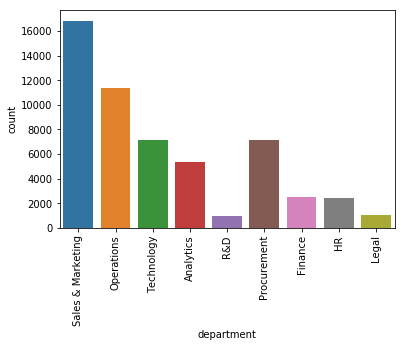

In [25]:
# Frequency plot of Employees w.r.t departments
sns.countplot(df['department'])
plt.xticks(rotation=90)
print("Total no. of Departments: "+str(len(df['department'].unique())))

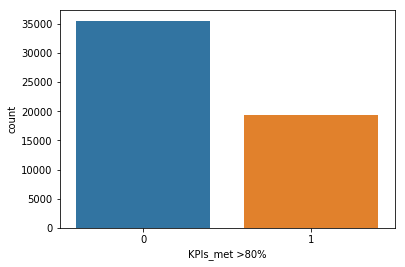

In [32]:
#Frequency plot of Employees whose Key Performance Indicators is > 80% (1--> KPIs >80%)
sns.countplot(df['KPIs_met >80%'])

37.94139283962727 % females Whose KPI is greater than 80%
34.03470490440566 % males Whose KPI is greater than 80%


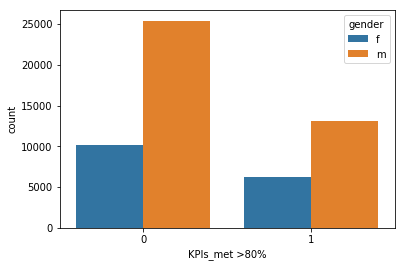

In [80]:
sns.countplot(df['KPIs_met >80%'],hue=df['gender'])
divide_gender_wrt('KPIs_met >80%', "Whose KPI is greater than 80%")  # calling divide_gender_w.r.t KPI>80%

Total no. of regions: 34


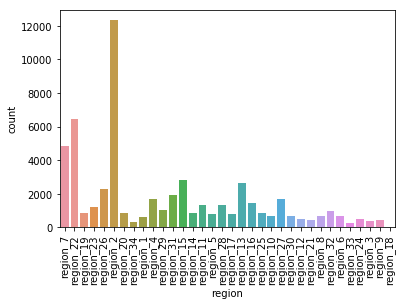

In [6]:
#frequency plot of employees w.r.t regions
sns.countplot(df['region'])
plt.xticks(rotation=90)
print("Total no. of regions: "+str(len(df['region'].unique())))

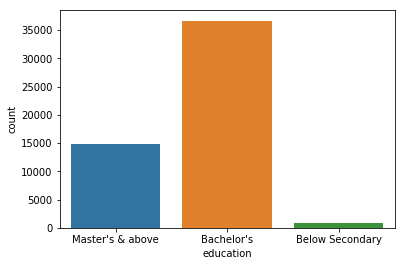

In [7]:
#frequency plot of Employees w.r.t Education
sns.countplot(df['education'])    # 69% employee's educational backgroud is Bachelor's
                                  # 28% Masters
                                  # 3% Below Secondary

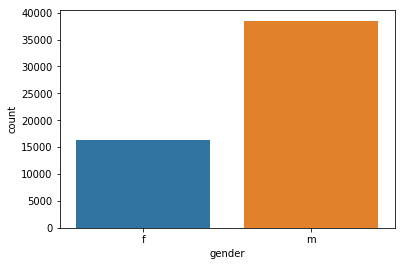

In [8]:
# frequency plot of employees w.r.t Gender
sns.countplot(df['gender'])                        # 70.73% are males while 29.76% are females

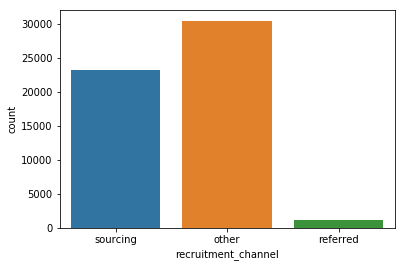

In [9]:
#frequency plot of Employees w.r.t Recruitment Channel
sns.countplot(df['recruitment_channel'])

# Frequency Distribution of age 
75% of the employess age is below 40 years

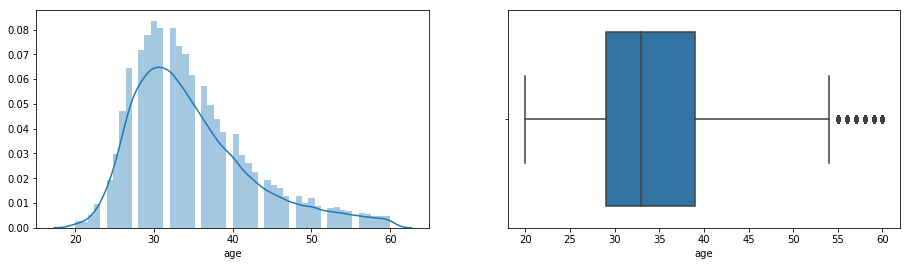

In [10]:
plt.subplots_adjust(left=23,right=25) 
plt.subplot(1,2,1)
sns.distplot(df['age'])
plt.subplot(1,2,2)
sns.boxplot(df['age'])

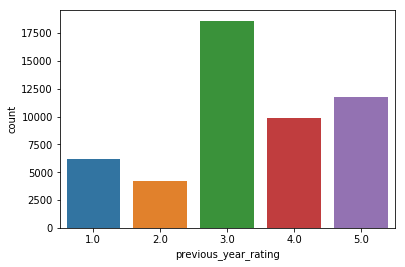

In [11]:
# Frequency plot of Employees w.r.t previous_year_rating
sns.countplot(df['previous_year_rating'])


# Distribution plot of Employe's length of service
# Conclusion: Majority of the employees got an experience below 13 years

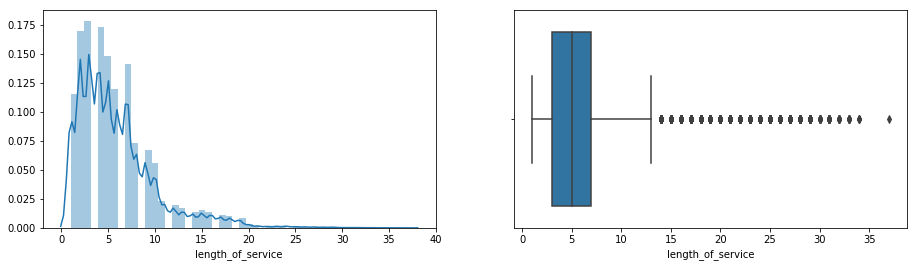

In [12]:
plt.subplots_adjust(left=23,right=25) 
plt.subplot(1,2,1)
sns.distplot(df['length_of_service'])
plt.subplot(1,2,2)
sns.boxplot(df['length_of_service'])

,awards_won?
0,53538
1,1270


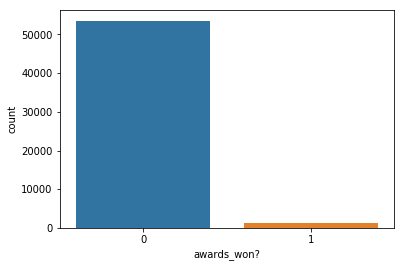

In [13]:
%matplotlib inline
sns.countplot(df['awards_won?'])                   
pd.DataFrame(df['awards_won?'].value_counts())    #    2.31% of the employees didn't won any awards


2.26213830308975 % females won award
2.3405029093931837 % males won award


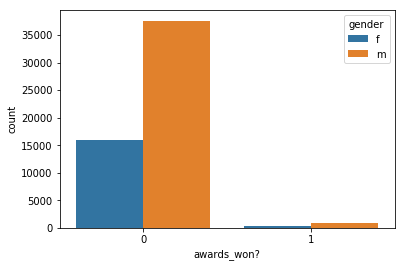

In [23]:
#Awards Won status w.r.t Gender
sns.countplot(df['awards_won?'],hue=df['gender'])
divide_gender_wrt('awards_won?', "won award")  # calling divide_gender_w.r.t

,is_promoted
0,50140
1,4668


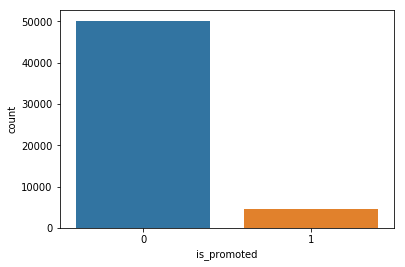

In [15]:
%matplotlib inline
sns.countplot(df['is_promoted'])
pd.DataFrame(df['is_promoted'].value_counts())

8.993379107405591 % females got promoted
8.315149625935161 % males got promoted


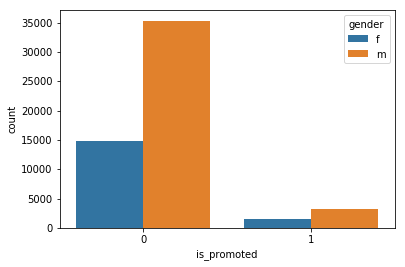

In [16]:
# Promotion Status w.r.t gender
sns.countplot(df['is_promoted'],hue=df['gender'])
divide_gender_wrt("is_promoted","got promoted")  

# Age Distribution w.r.t Gender
conclusion: Age distribution is kind of Similar even the number of males are greater than females

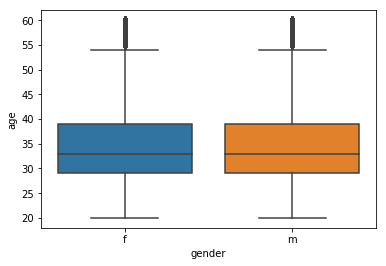

In [17]:
sns.boxplot(x='gender',y='age',data=df)

# Avg Training Score distribution w.r.t Gender
Conclusion: 75% of the female employee's avg training score is below 73 while
            75% of the male employee's avg training score is below 76

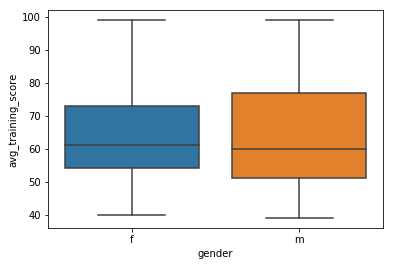

In [18]:
sns.boxplot(df['gender'],df['avg_training_score'])

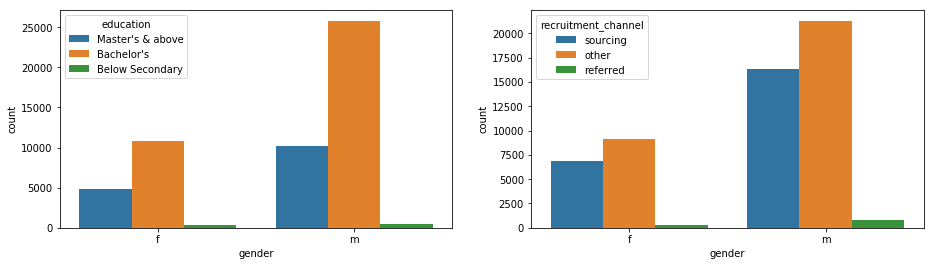

In [19]:
# Frequency plot of Gender w.r.t( Education and Recruitment Channel)
plt.subplots_adjust(left=23,right=25) 
plt.subplot(1,2,1)
sns.countplot(df['gender'],hue=df['education'])
plt.subplot(1,2,2)
sns.countplot(df['gender'],hue=df['recruitment_channel'])

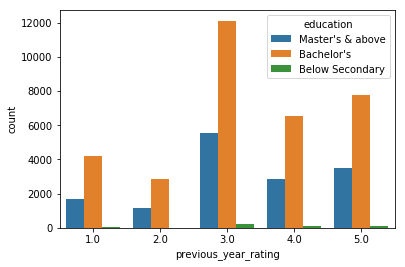

In [21]:
# Frequency plot of previous_year_rating w.r.t education
sns.countplot(df['previous_year_rating'],hue=df['education'])

employee_id             0.001206
no_of_trainings        -0.024896
age                    -0.017166
previous_year_rating    0.159320
length_of_service      -0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
is_promoted             1.000000
Name: is_promoted, dtype: float64


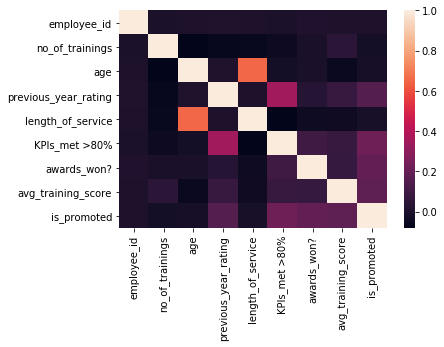

In [37]:
corr=df.corr()            # correlation matrix
sns.heatmap(corr)
print(corr.loc['is_promoted'])       # Correlation W.r.t Is_promoted(Label)
                                     # Conclusion:  Is_promoted is highly correlated with 
        #                                                                                1) KPIs_met >80%
        #                                                                                2) awards_won?
        #                                                                                3) avg_training_score
        #                                                                                4) Previous_year_rating

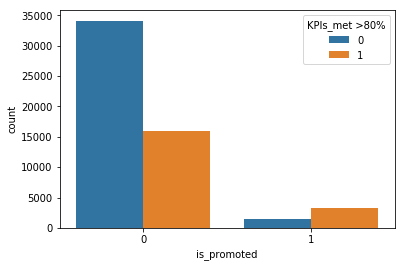

In [40]:
# Frequency plot of Promotion status w.r.t KPIs_met >80% feature
sns.countplot(df['is_promoted'],hue=df['KPIs_met >80%'])

Text(0.5,1,'Employees who get promoted')

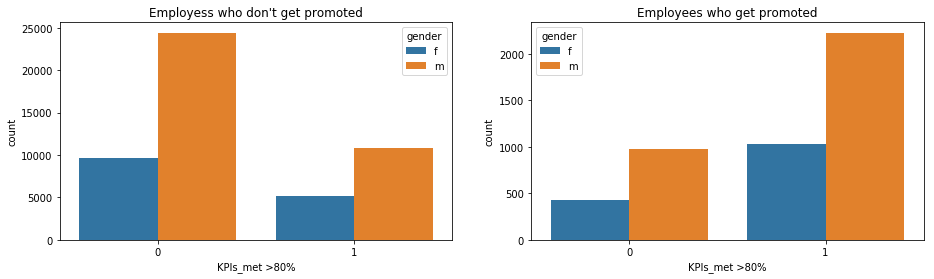

In [49]:
df_0_promoted_i=df['is_promoted']==0    # index of the df where employees don't get promoted
df_0_promoted=df[df_0_promoted_i]       # Dataframe where employees don't get promoted
df_1_promoted_i=df['is_promoted']==1   # index of the df where employees  get promoted
df_1_promoted=df[df_1_promoted_i]     # Dataframe where employees get promoted
#--------------------------------------------------------------------#----------------------------------------------------------
plt.subplots_adjust(left=23,right=25)
plt.subplot(1,2,1)
sns.countplot(df_0_promoted['KPIs_met >80%'],hue=df_0_promoted['gender'])
plt.title("Employess who don't get promoted")
plt.subplot(1,2,2)
sns.countplot(df_1_promoted['KPIs_met >80%'],hue=df_1_promoted['gender'])
plt.title("Employees who get promoted")

# Box plot of Avg_training_score w.r.t (Promoted and KPI feature) 

Text(0.5,1,'Get promoted as well as their KPI >80%')

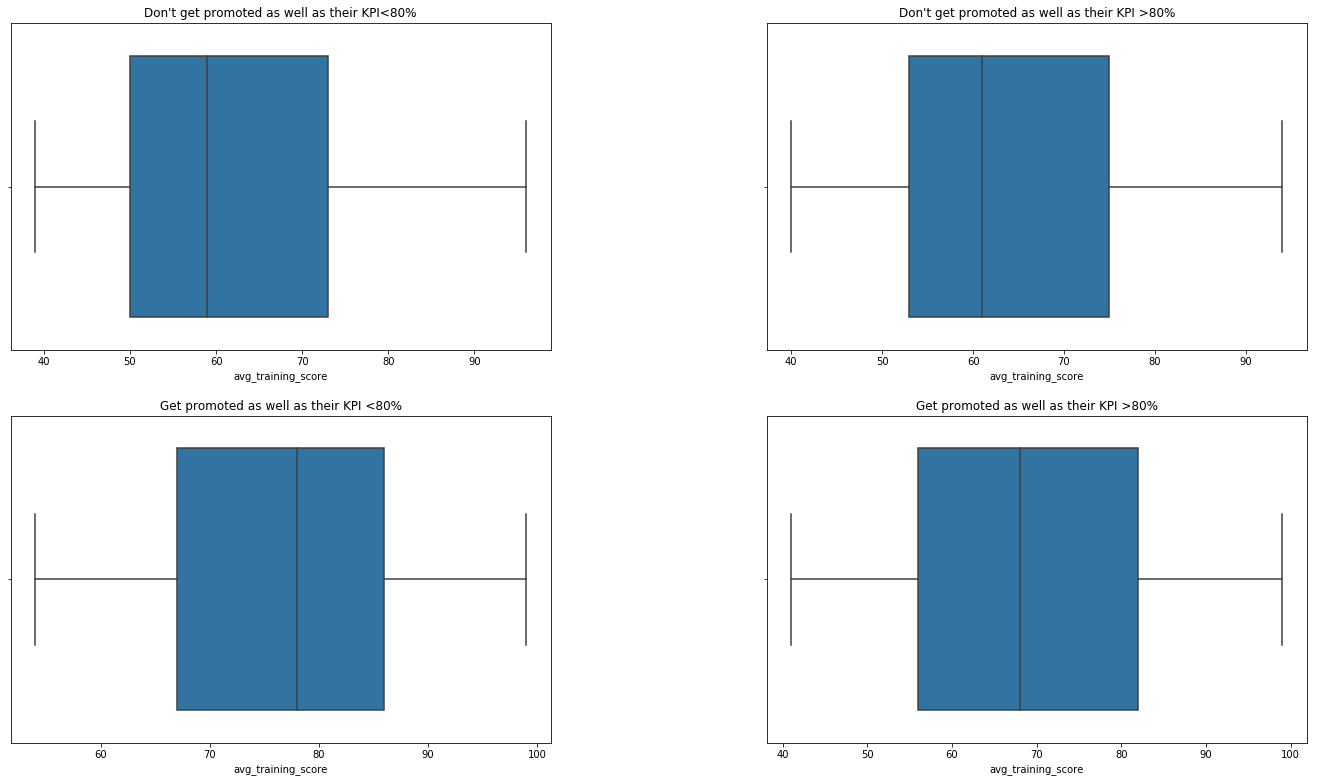

In [96]:
df_0_p_0_kpi_i=df_0_promoted['KPIs_met >80%']==0   # index of the df where employees don't get promoted as well as their KPI is <80% 
df_0_p_0_kpi=df_0_promoted[df_0_p_0_kpi_i]         #  df where employees don't get promoted as well as their KPI is <80% 
df_0_p_1_kpi_i=df_0_promoted['KPIs_met >80%']==1  # index of the df where employees don't get promoted as well as their KPI is >80% 
df_0_p_1_kpi=df_0_promoted[df_0_p_1_kpi_i]        # df where employees don't get promoted as well as their KPI is >80%

df_1_p_0_kpi_i=df_1_promoted['KPIs_met >80%']==0  # index of the df where employees get promoted as well as their KPI is <80% 
df_1_p_0_kpi=df_1_promoted[df_1_p_0_kpi_i]        #  df where employees get promoted as well as their KPI is <80% 
df_1_p_1_kpi_i=df_1_promoted['KPIs_met >80%']==1 # index of the df where employees get promoted as well as their KPI is > 80% 
df_1_p_1_kpi=df_1_promoted[df_1_p_1_kpi_i]       # df where employees get promoted as well as their KPI is > 80%
#-----------------------------------------------------#--------------------------------------------------------------------------
plt.subplots_adjust(left=22,right=25,bottom=0.4,top=2.9,wspace=0.4,hspace=0.2)
plt.subplot(2,2,1)
sns.boxplot(df_0_p_0_kpi['avg_training_score'])
plt.title("Don't get promoted as well as their KPI<80%")
plt.subplot(2,2,2)
sns.boxplot(df_0_p_1_kpi['avg_training_score'])
plt.title("Don't get promoted as well as their KPI >80%")
plt.subplot(2,2,3)
sns.boxplot(df_1_p_0_kpi['avg_training_score'])
plt.title("Get promoted as well as their KPI <80%")
plt.subplot(2,2,4)
sns.boxplot(df_1_p_1_kpi['avg_training_score'])
plt.title("Get promoted as well as their KPI >80%")

# Box plot of Avg_training_score w.r.t (Promoted, KPI feature, Gender) 

Text(0.5,1,'Get promoted as well as their KPI >80%')

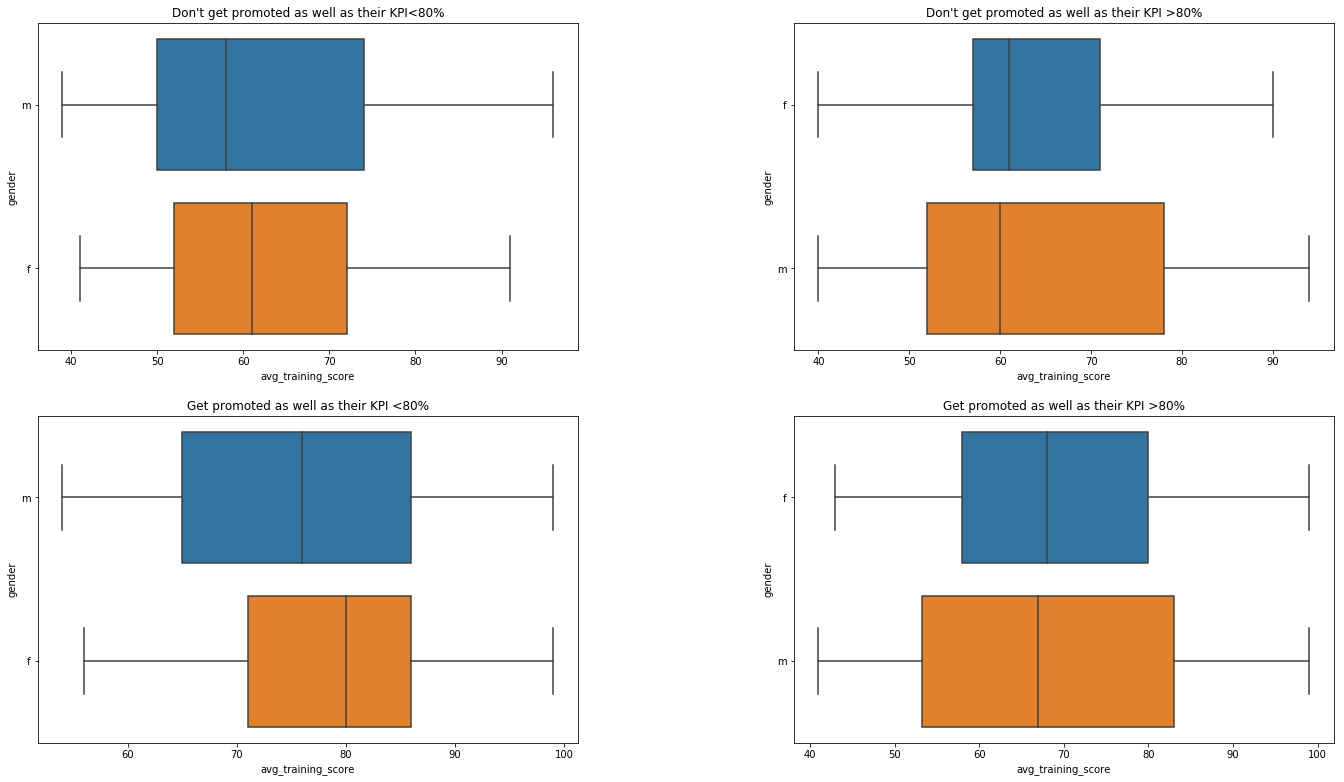

In [109]:
plt.subplots_adjust(left=22,right=25,bottom=0.4,top=2.9,wspace=0.4,hspace=0.2)
plt.subplot(2,2,1)
sns.boxplot(df_0_p_0_kpi['avg_training_score'],y=df_0_p_0_kpi['gender'])
plt.title("Don't get promoted as well as their KPI<80%")

plt.subplot(2,2,2)
sns.boxplot(df_0_p_1_kpi['avg_training_score'],y=df_0_p_1_kpi['gender'])
plt.title("Don't get promoted as well as their KPI >80%")

plt.subplot(2,2,3)
sns.boxplot(df_1_p_0_kpi['avg_training_score'],y=df_1_p_0_kpi['gender'])
plt.title("Get promoted as well as their KPI <80%")

plt.subplot(2,2,4)
sns.boxplot(df_1_p_1_kpi['avg_training_score'],y=df_1_p_1_kpi['gender'])
plt.title("Get promoted as well as their KPI >80%")

# count plot of awards_won? w.r.t (Promoted, KPI feature, Gender) 

Text(0.5,1,'Get promoted as well as their KPI >80%')

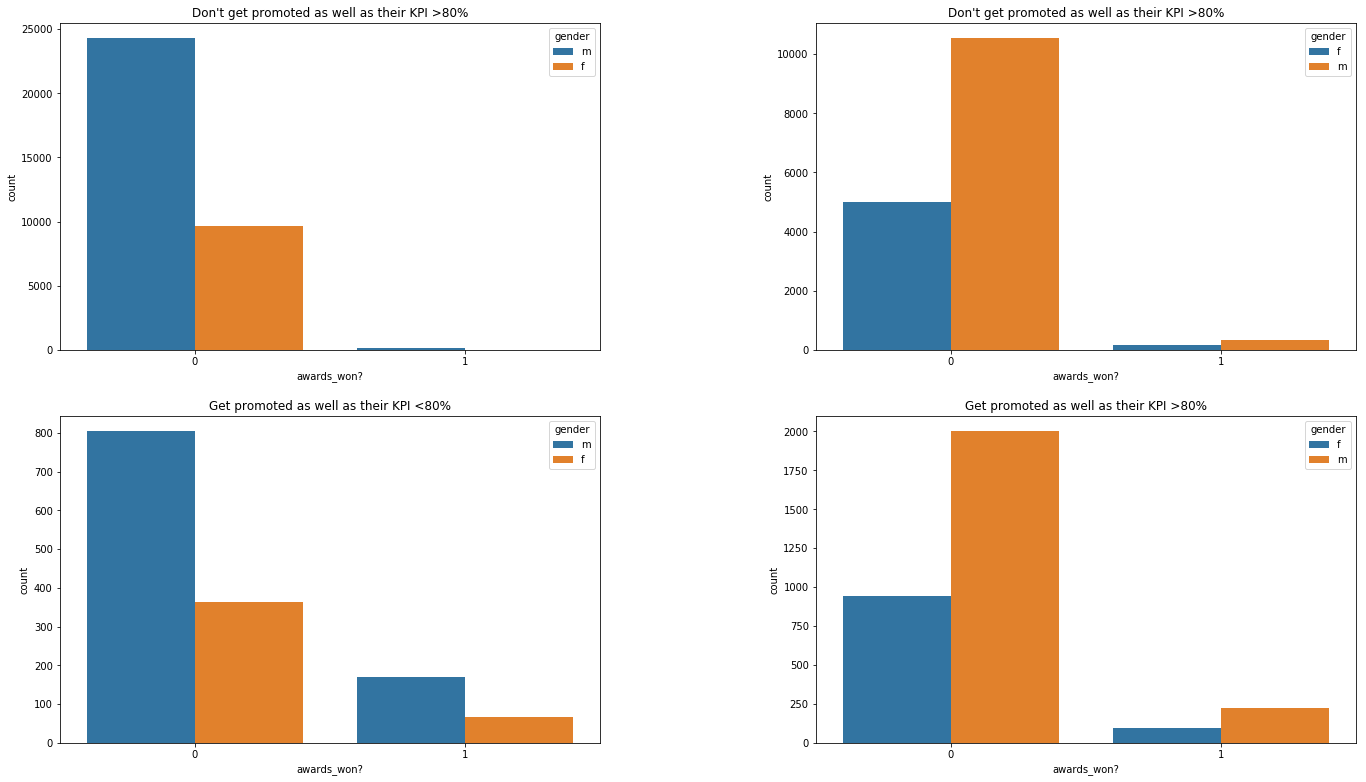

In [111]:
plt.subplots_adjust(left=22,right=25,bottom=0.4,top=2.9,wspace=0.4,hspace=0.2)
plt.subplot(2,2,1)
sns.countplot(df_0_p_0_kpi['awards_won?'],hue=df_0_p_0_kpi['gender'])
plt.title("Don't get promoted as well as their KPI >80%")
plt.subplot(2,2,2)
sns.countplot(df_0_p_1_kpi['awards_won?'],hue=df_0_p_1_kpi['gender'])
plt.title("Don't get promoted as well as their KPI >80%")
plt.subplot(2,2,3)
sns.countplot(df_1_p_0_kpi['awards_won?'],hue=df_1_p_0_kpi['gender'])
plt.title("Get promoted as well as their KPI <80%")
plt.subplot(2,2,4)
sns.countplot(df_1_p_1_kpi['awards_won?'],hue=df_1_p_1_kpi['gender'])
plt.title("Get promoted as well as their KPI >80%")